# Introducción a regresión lineal 
En esta notebook aprenderemos qué es una regresión lineal y cómo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

## Importando datos

In [68]:
import pandas as pd
df = pd.read_csv('./housing.csv', header=None, sep='\s+')

In [69]:
# Nombre de las columnas
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [70]:
# Asignamos el nombre de las columnas al df
df.columns = column_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Signicado de Nombres**:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

## Entendiendo los datos
Una vez descargados los datos lo que hay que hacer es entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que yo recomiendo que empecemos viendo un gráfico de correlaciones usando pairplot de Seaborn.

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
# Estilo a los graficos
sns.set(style='whitegrid', context='notebook')

# Seleccion de las variables de interes
cols = ['DIS','INDUS','CRIM','RM','MEDV']

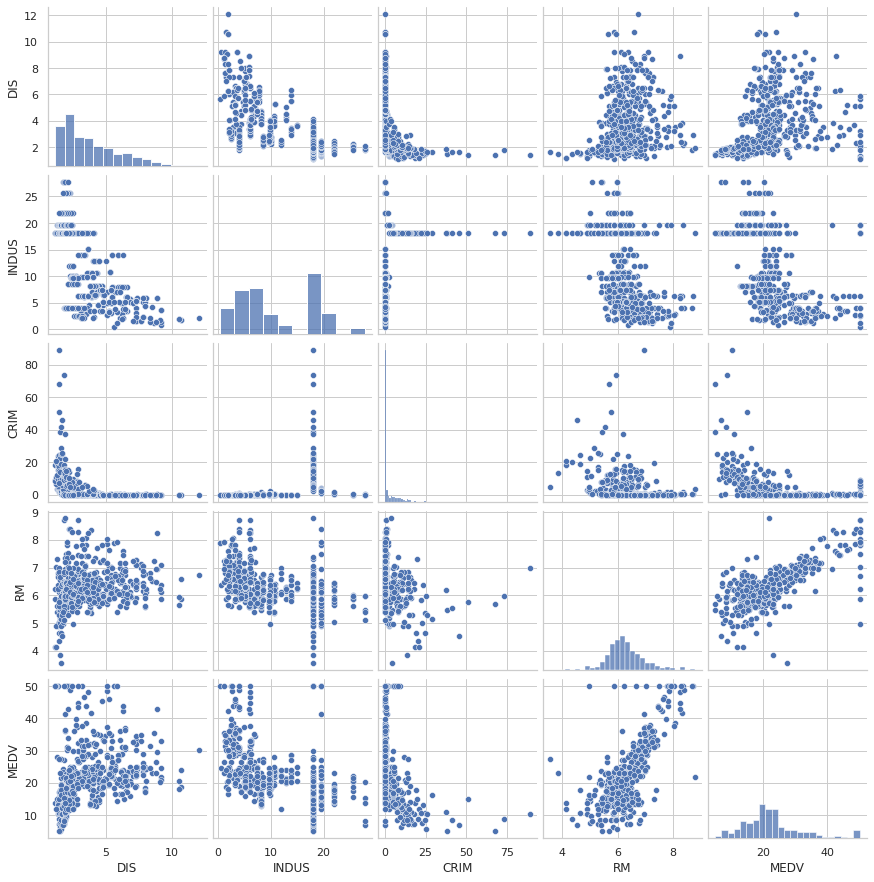

In [73]:
# Matriz de graficas que muestras todas las relaciones entre las variables
# height indica en tamano de los valores
sns.pairplot(df[cols], height=2.5);

Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones. 

In [74]:
# importamos numpy
import numpy as np

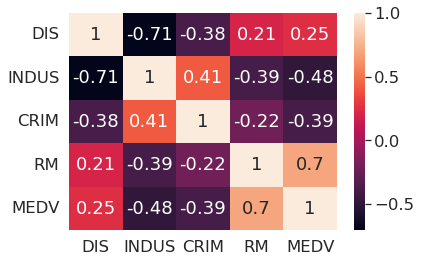

In [75]:
# calculo de correlaciones entre las variables
cm = np.corrcoef(df[cols].values.T)

# modificar tamano de valores en el grafico
sns.set(font_scale=1.5)

# heatmap para mostrar la informacion
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols);

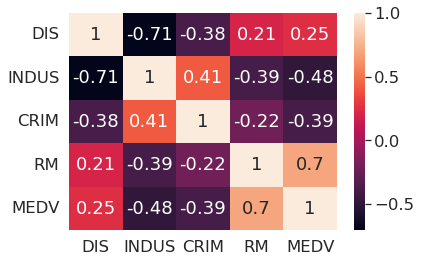

In [76]:
# otra forma alternativa de crear el heatmap con Pandas
# modificar tamano de valores
sns.set(font_scale=1.5)

#
sns.heatmap(df[cols].corr(), cbar=True, annot=True, yticklabels=cols, xticklabels=cols);

Del grafico notamos que:
- RM esta bastante correlacionado con nuestra variable objetivo (MEDV).
- La segunda variable mejor correlacionada con MEDV es INDUS. Es una correlacion negativa

## Creando modelo con scikit-learn

In [77]:
# Importamos libreria
from sklearn.preprocessing import  StandardScaler # ayuda a escalar los datos para que el modelo se ajuste mejor a ellos
from sklearn.linear_model import LinearRegression # funcion que se utiliza para la regresion

In [78]:
# definimos la variable objetivo y el feature

# feature
X = df['RM'].values.reshape(-1,1)

# Variable objetivo
y = df['MEDV'].values.reshape(-1,1)

# mostramos los valores
print(X)
# print(y)

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211]
 [6.249]
 [6.625]
 [6.163]
 [8.069]
 [7.82 ]
 [7.416]
 [6.727]
 [6.781]
 [6.405]
 [6.137]
 [6.167]
 [5.851]
 [5.836]
 [6.127]
 [6.474]
 [6.229]
 [6.195]
 

In [79]:
'''Explicacion reshape

Tenemos el siguiente array: arr = [2,3,4,5,6,7,8]
Su forma es(7,) lo que indica que es de una dimension

Al aplicar reshape: arr.reshape(-1,1) obtenemos
[[2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8]]
Su forma ahoras es (7,1) por lo que agregar una dimension
'''

'Explicacion reshape\n\nTenemos el siguiente array: arr = [2,3,4,5,6,7,8]\nSu forma es(7,) lo que indica que es de una dimension\n\nAl aplicar reshape: arr.reshape(-1,1) obtenemos\n[[2],\n [3],\n [4],\n [5],\n [6],\n [7],\n [8]]\nSu forma ahoras es (7,1) por lo que agregar una dimension\n'

In [84]:
# Estandarizamos los valores para ajustar mejor el modelo
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

# mostramos valores estandarizados
print(X_std)

[[ 4.13671889e-01]
 [ 1.94274453e-01]
 [ 1.28271368e+00]
 [ 1.01630251e+00]
 [ 1.22857665e+00]
 [ 2.07096381e-01]
 [-3.88410945e-01]
 [-1.60465557e-01]
 [-9.31205901e-01]
 [-3.99808215e-01]
 [ 1.31589471e-01]
 [-3.92684921e-01]
 [-5.63643963e-01]
 [-4.78164442e-01]
 [-2.68739617e-01]
 [-6.42000190e-01]
 [-4.98109663e-01]
 [-4.19753436e-01]
 [-1.18052117e+00]
 [-7.94438668e-01]
 [-1.01811008e+00]
 [-4.55369903e-01]
 [-2.03205317e-01]
 [-6.71918022e-01]
 [-5.13780909e-01]
 [-9.76794979e-01]
 [-6.71918022e-01]
 [-3.38547892e-01]
 [ 2.99699195e-01]
 [ 5.54713098e-01]
 [-8.14383890e-01]
 [-3.02931425e-01]
 [-4.76739783e-01]
 [-8.31479794e-01]
 [-2.68739617e-01]
 [-5.00958981e-01]
 [-6.32027579e-01]
 [-6.19205651e-01]
 [-4.53945244e-01]
 [ 4.42165063e-01]
 [ 1.05334363e+00]
 [ 6.91480331e-01]
 [-1.64739533e-01]
 [-1.04903869e-01]
 [-3.07205401e-01]
 [-8.58548308e-01]
 [-7.10383806e-01]
 [-3.62767089e-01]
 [-1.26172671e+00]
 [-9.72521003e-01]
 [-4.58219220e-01]
 [-2.41671102e-01]
 [ 3.2249373

In [81]:
# modelo de regresion lineal
slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

## Análisis de resultados

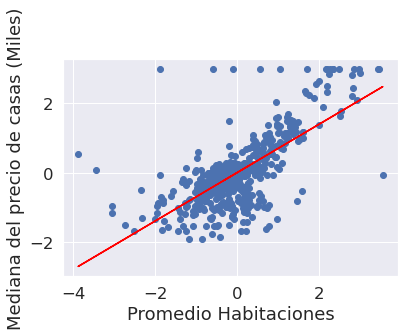

In [82]:
# grafica de los valores entandarizados
plt.scatter(X_std, y_std)

# Grafica de regresion
plt.plot(X_std, slr.predict(X_std), color='Red')
plt.ylabel('Mediana del precio de casas (Miles)')
plt.xlabel('Promedio Habitaciones');

## Generando predicción con el modelo

In [86]:
# Cual es el precio medio de una casa que tiene 5 habitaciones?

# indicamos el numero de habitaciones en una variable
num_hab = 5


# Estadarizamos el numero de habitaciones
num_hab_std = sc_x.transform(np.array([num_hab]).reshape(-1,1))

# Generamos la prediccion
pred = slr.predict(num_hab_std)
pred

# invertimos el valor de la prediccion en su valor real
precio_pred = sc_y.inverse_transform(pred)

# mostramos resultados
print('El precio de una casa con 5 habitaciones en Boston es de ',precio_pred)

El precio de una casa con 5 habitaciones en Boston es de  [[10.83992413]]
